In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
#import seaborn as sn

In [2]:
crime=pd.read_csv(r"C:\Users\ADITYA\Desktop\EXCELR ASSIGNMENT\CLUSTERING\crime_data.csv")

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime1=crime.iloc[:,1:]

In [5]:
crime1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [6]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime1)

In [8]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


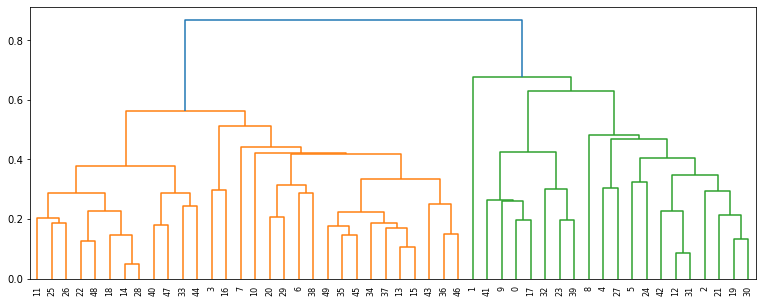

In [9]:
# create dendrogram
fig = plt.figure(figsize=(13,5))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'),color_threshold=0.7)

In [10]:
# create clusters
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'average')

In [11]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [12]:
Clusters

,Clusters
0,3
1,5
2,0
3,2
4,0
5,0
6,1
7,1
8,0
9,3


In [13]:
crime['h_clusterid'] = Clusters

In [14]:
crime.sort_values("h_clusterid")

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
24,Missouri,9.0,178,70,28.2,0
27,Nevada,12.2,252,81,46.0,0
30,New Mexico,11.4,285,70,32.1,0
31,New York,11.1,254,86,26.1,0
12,Illinois,10.4,249,83,24.0,0
19,Maryland,11.3,300,67,27.8,0
8,Florida,15.4,335,80,31.9,0
21,Michigan,12.1,255,74,35.1,0
5,Colorado,7.9,204,78,38.7,0
4,California,9.0,276,91,40.6,0


In [15]:
crime.groupby('h_clusterid').agg(['mean'])

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_4676\77873464.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime.groupby('h_clusterid').agg(['mean'])


,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
h_clusterid,,,,
0,10.883333,256.916667,78.333333,32.250000
1,5.656250,138.875000,73.875000,18.781250
2,9.250000,149.500000,51.000000,17.900000
3,14.671429,251.285714,54.285714,21.685714
4,3.091667,76.000000,52.083333,11.833333
5,10.000000,263.000000,48.000000,44.500000


In [16]:
crime['h_clusterid'].value_counts()

1    16
0    12
4    12
3     7
2     2
5     1
Name: h_clusterid, dtype: int64

AIRLINE

In [17]:
airline=pd.read_csv(r"C:\Users\ADITYA\Desktop\EXCELR ASSIGNMENT\CLUSTERING\EastWestAirlines1.csv")

In [18]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [19]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [20]:
airline1=airline.iloc[:,1:]

In [21]:
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [22]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [23]:
# Normalized data frame (considering the numerical part of data)
df_norm1 = norm_func(airline1)

In [24]:
df_norm1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


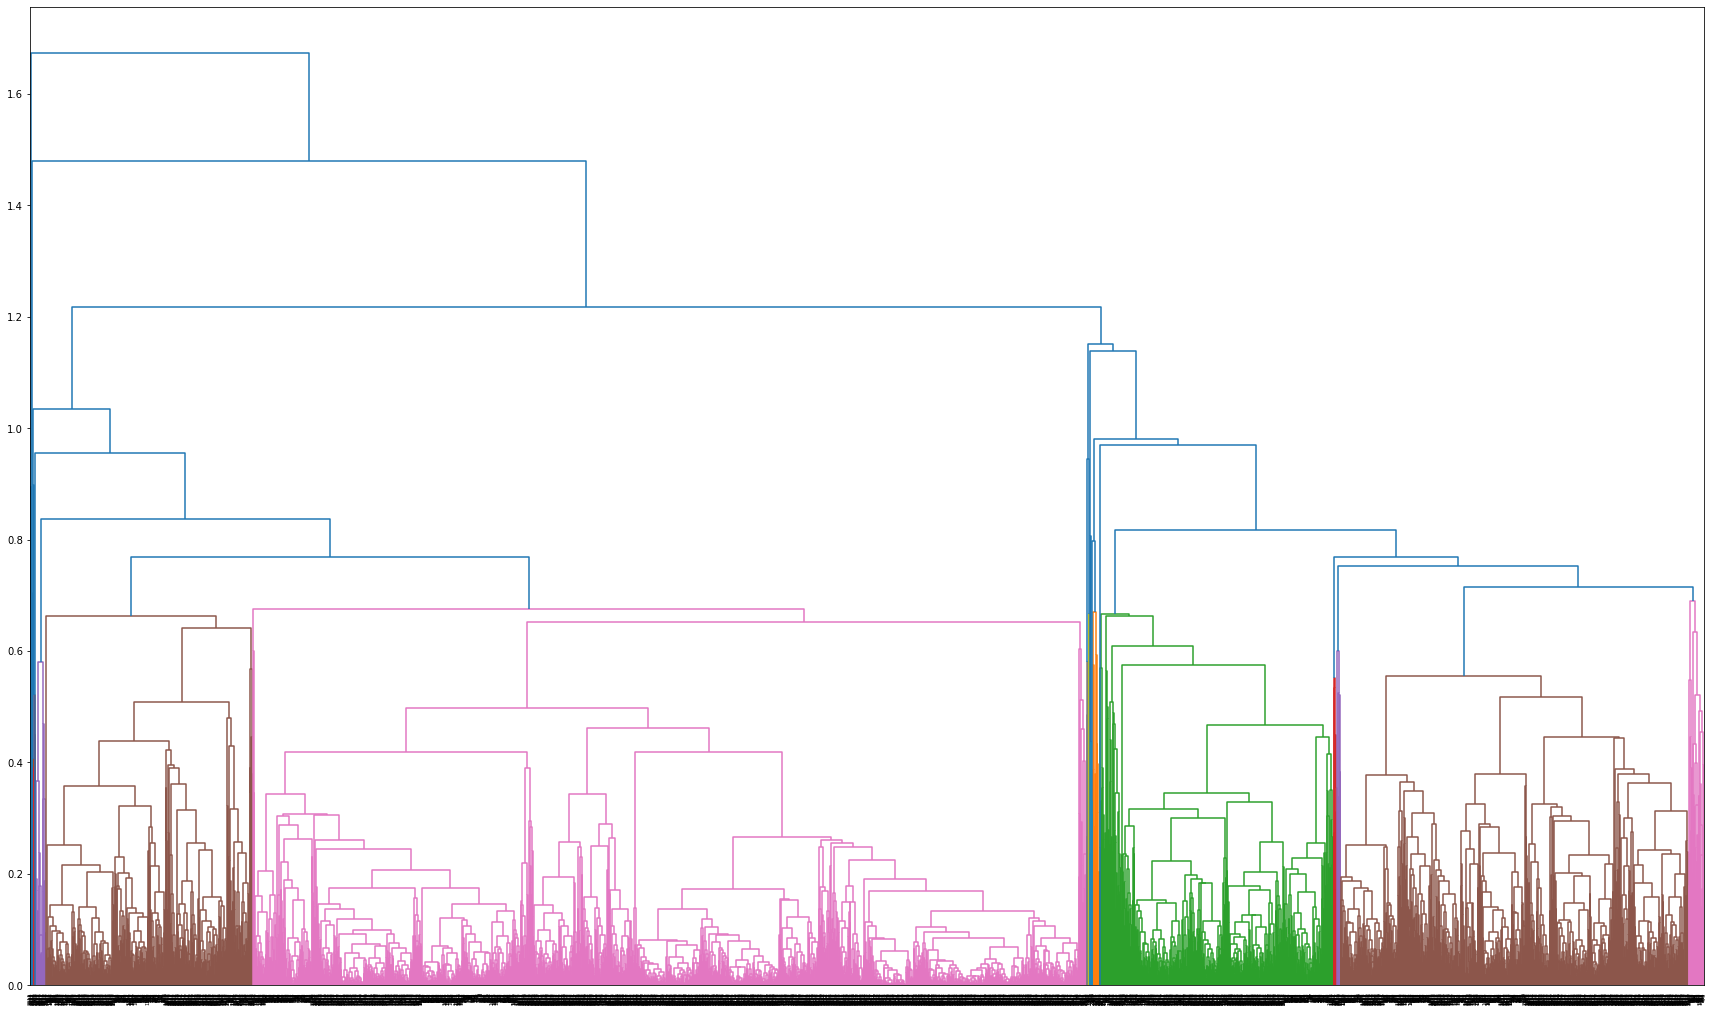

In [29]:
# create dendrogram
fig = plt.figure(figsize=(30,18))
dendrogram1 = sch.dendrogram(sch.linkage(df_norm1, method='average'),color_threshold=0.7)

In [31]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [32]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm1)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [33]:
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [34]:
airline['h_clusterid'] = Clusters

In [35]:
airline.sort_values("h_clusterid")

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,2016,327126,1452,5,1,1,97997,25,350,3,4440,1,0
1505,1520,391222,0,3,1,1,27471,20,1600,7,4905,1,0
1503,1518,507371,0,4,1,1,51765,18,450,1,4770,1,0
3165,3187,194816,0,1,1,1,20822,25,6647,12,2424,1,0
1501,1516,54116,1846,3,1,1,34997,14,0,0,4848,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,4
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,4
2364,2382,108081,0,5,1,5,217006,24,0,0,3567,1,4
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,4


In [36]:
airline.groupby('h_clusterid').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
h_clusterid,,,,,,,,,,,,
0,1745.220708,9.597426e+04,240.572888,2.656676,1.015668,1.000681,28342.702997,15.547003,804.152589,2.461853,4627.118529,1.0
1,2173.169182,5.980784e+04,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
2,279.000000,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.0
3,3128.000000,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0
4,1306.000000,7.656512e+04,147.750000,3.875000,1.000000,4.250000,115273.250000,30.250000,600.000000,2.000000,5127.875000,1.0


In [37]:
airline['h_clusterid'].value_counts()

1    2518
0    1468
4       8
3       4
2       1
Name: h_clusterid, dtype: int64